In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
trainData =  pd.read_csv('https://raw.githubusercontent.com/team000012/kaggle-challenge/main/train.csv')
testData = pd.read_csv('https://raw.githubusercontent.com/team000012/kaggle-challenge/main/test.csv')
trainData

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


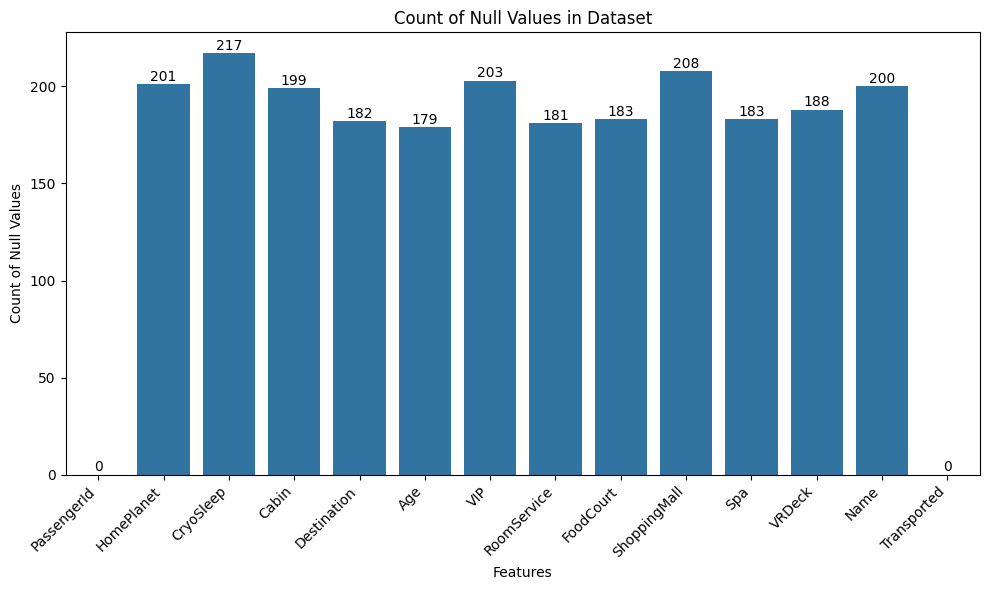

In [3]:
# Count null values in each column
null_counts = trainData.isnull().sum()
plt.figure(figsize=(10, 6))
for i, value in enumerate(null_counts.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.title('Count of Null Values in Dataset')
plt.xlabel('Features')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

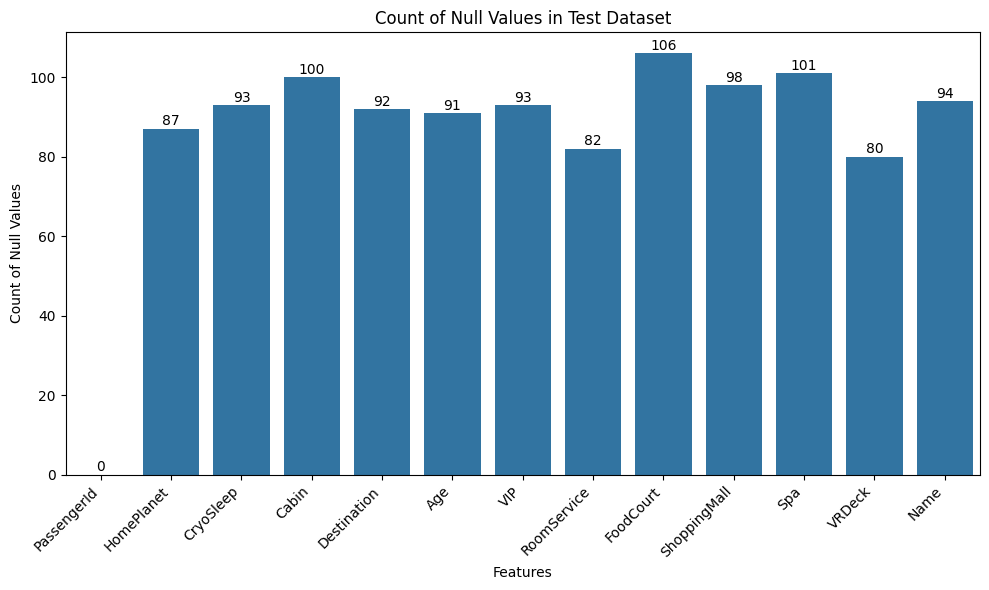

In [4]:
# Count null values in each column
null_counts = testData.isnull().sum()
plt.figure(figsize=(10, 6))
for i, value in enumerate(null_counts.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.title('Count of Null Values in Test Dataset')
plt.xlabel('Features')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-5-2edf05ae6381>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='muted')


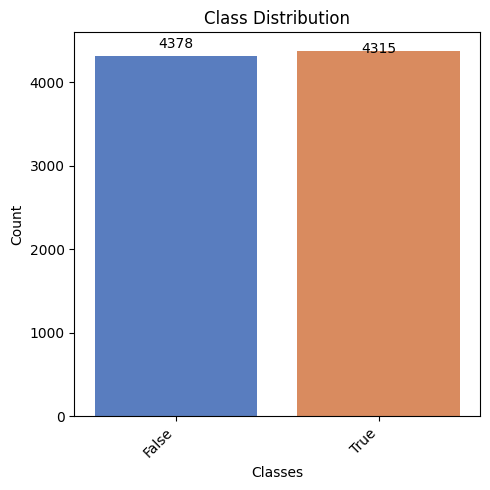

In [5]:
#checking for imbalance in dataset
class_counts = trainData['Transported'].value_counts()
plt.figure(figsize=(5, 5))
for i, value in enumerate(class_counts.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
sns.barplot(x=class_counts.index, y=class_counts.values, palette='muted')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
from sklearn.impute import KNNImputer
numerical_cols = trainData.select_dtypes(include=['number']).columns

# Apply KNN Imputer to numerical columns only
imputer = KNNImputer(n_neighbors=2)
train_imputed_values = imputer.fit_transform(trainData[numerical_cols])
test_imputed_values = imputer.transform(testData[numerical_cols])

# Convert back to DataFrame
train_imputed_df = pd.DataFrame(train_imputed_values, columns=numerical_cols)
test_imputed_df = pd.DataFrame(test_imputed_values, columns=numerical_cols)

# Combine with non-numerical columns
train_imputed_df = pd.concat([train_imputed_df, trainData[trainData.columns.difference(numerical_cols)]], axis=1)
test_imputed_df = pd.concat([test_imputed_df, testData[testData.columns.difference(numerical_cols)]], axis=1)
train_imputed_df.isnull().sum()

Age               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Cabin           199
CryoSleep       217
Destination     182
HomePlanet      201
Name            200
PassengerId       0
Transported       0
VIP             203
dtype: int64

In [7]:
train_imputed_df.drop(['Name','PassengerId','Cabin'],inplace = True,axis=1)

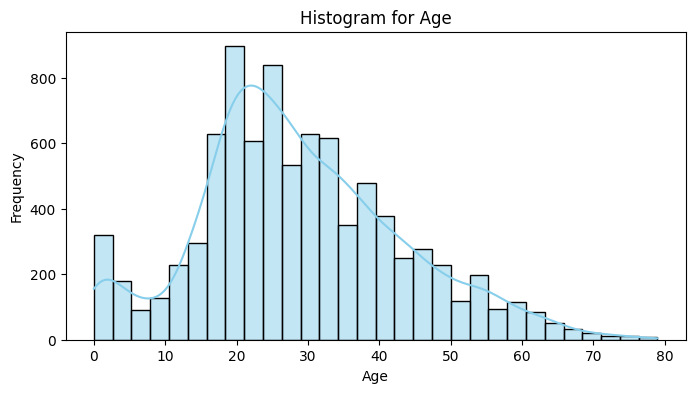

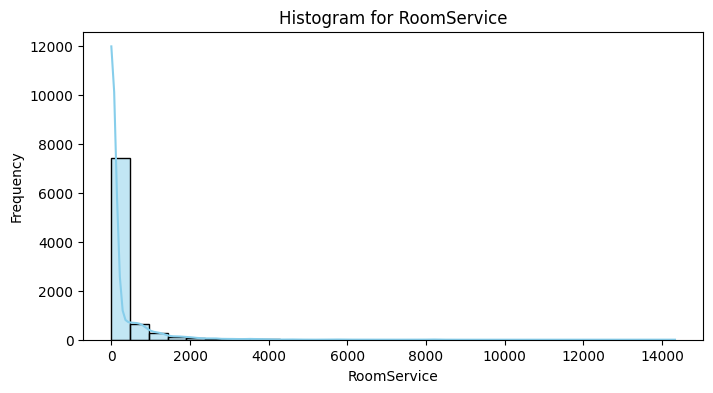

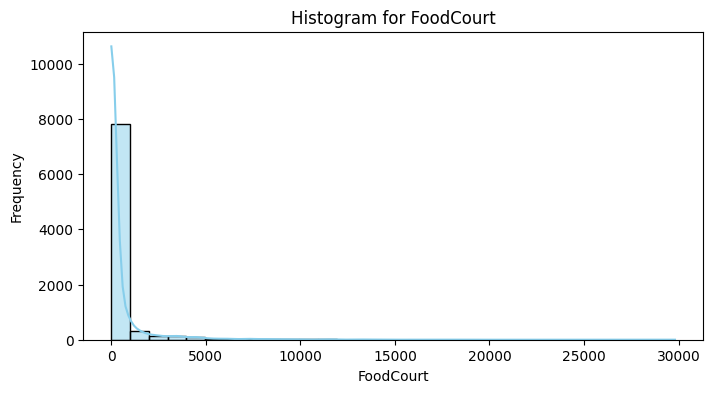

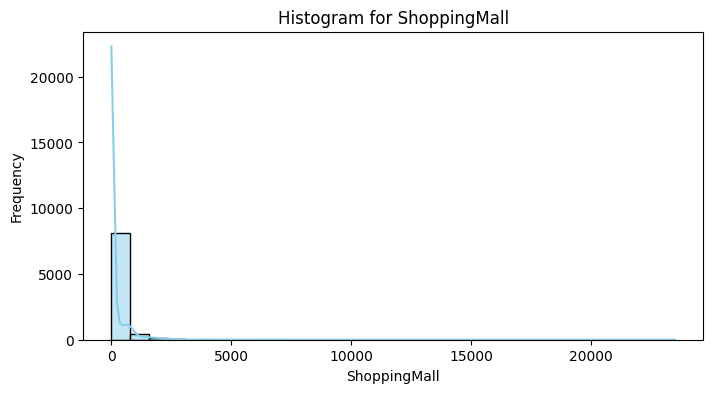

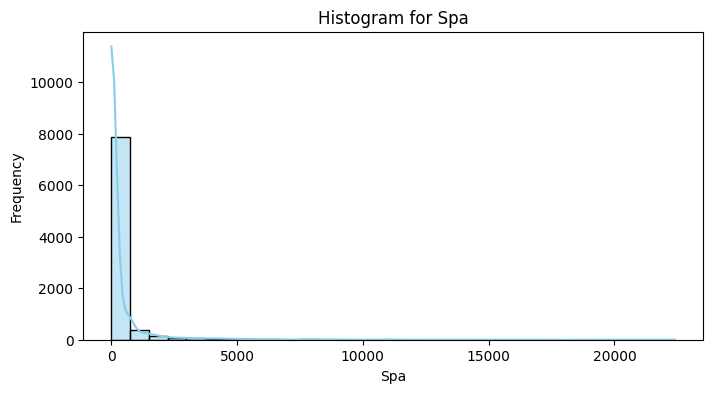

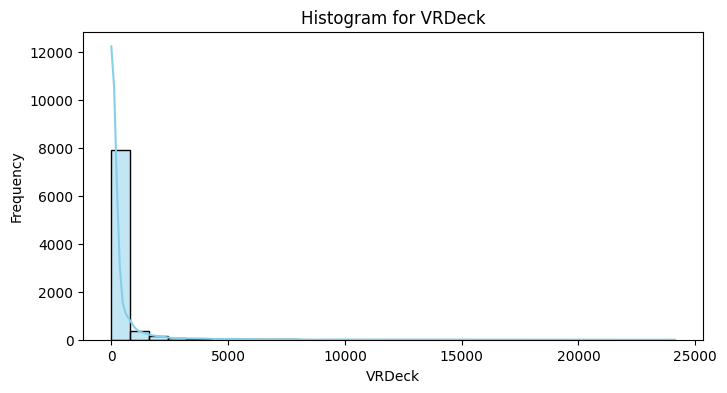

In [8]:
# Plot histograms with KDE for numerical columns
numerical_columns = train_imputed_df.select_dtypes(include=['int', 'float']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_imputed_df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


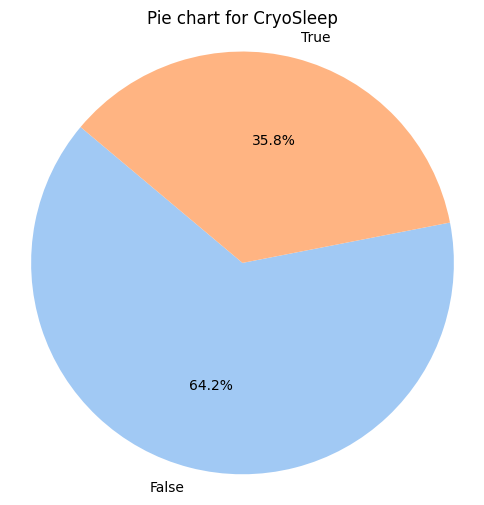

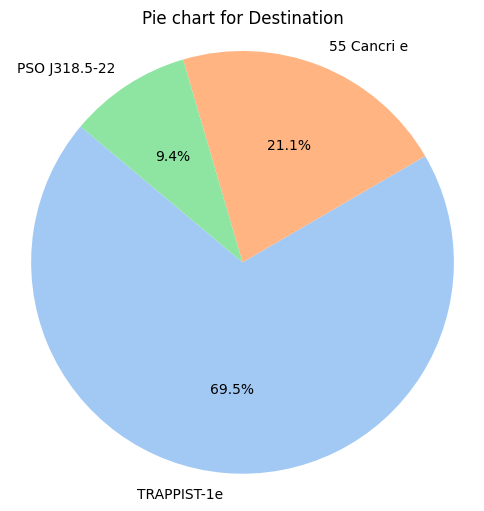

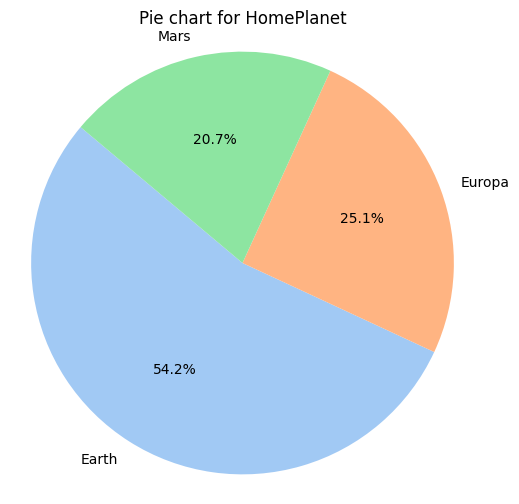

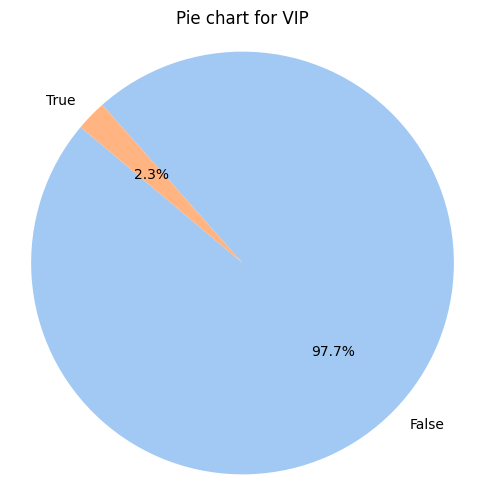

In [9]:
# Plot pie charts for categorical columns
categorical_columns = train_imputed_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(6, 6))
    train_imputed_df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
    plt.title(f'Pie chart for {col}')
    plt.ylabel('')
    plt.axis('equal')
    plt.show()